In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("C:/Users/Samsung/Desktop/3.sınıf bahar dönemi/Introduction Machine Learning/column_2C_weka.csv")

In [3]:
data.head()

,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
0,63.027818,22.552586,39.609117,40.475232,98.672917,-0.254400,Abnormal
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,Abnormal
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,Abnormal
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,Abnormal
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,Abnormal


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 310 entries, 0 to 309
Data columns (total 7 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   pelvic_incidence          310 non-null    float64
 1   pelvic_tilt numeric       310 non-null    float64
 2   lumbar_lordosis_angle     310 non-null    float64
 3   sacral_slope              310 non-null    float64
 4   pelvic_radius             310 non-null    float64
 5   degree_spondylolisthesis  310 non-null    float64
 6   class                     310 non-null    object 
dtypes: float64(6), object(1)
memory usage: 17.1+ KB


In [5]:
data['class'].value_counts()

Abnormal    210
Normal      100
Name: class, dtype: int64

In [6]:
d_stat = data.describe()
d_stat

,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis
count,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000
mean,60.496653,17.542822,51.930930,42.953831,117.920655,26.296694
std,17.236520,10.008330,18.554064,13.423102,13.317377,37.559027
min,26.147921,-6.554948,14.000000,13.366931,70.082575,-11.058179
25%,46.430294,10.667069,37.000000,33.347122,110.709196,1.603727
50%,58.691038,16.357689,49.562398,42.404912,118.268178,11.767934
75%,72.877696,22.120395,63.000000,52.695888,125.467674,41.287352
max,129.834041,49.431864,125.742385,121.429566,163.071041,418.543082


In [7]:
# Filtering only abnormal patients:
d_new = data[data['class'] == 'Abnormal']

# Our graphics x will be pelvic incidence and y will be sacral slope values:
x = np.array(d_new.loc[:,'pelvic_incidence']).reshape(-1,1)
y = np.array(d_new.loc[:, 'sacral_slope']).reshape(-1,1)

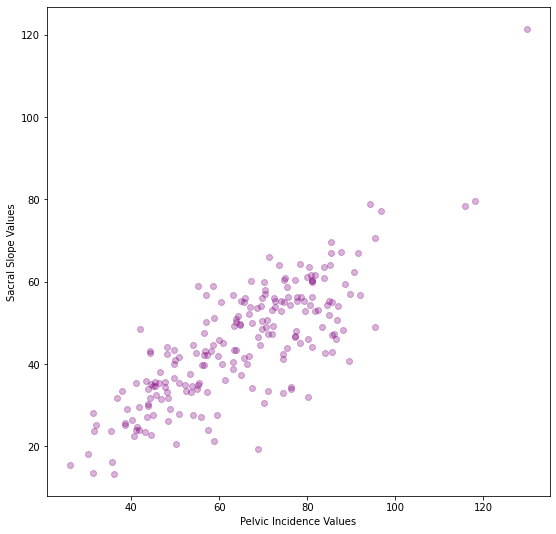

In [8]:
# Now visualize the values:
plt.figure(figsize=(9,9))
plt.scatter(x=x, y=y, color='purple', alpha=0.3)
plt.xlabel('Pelvic Incidence Values')
plt.ylabel('Sacral Slope Values')
plt.show()

LINEAR REGRESSION

In [9]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(x,y)

LinearRegression()

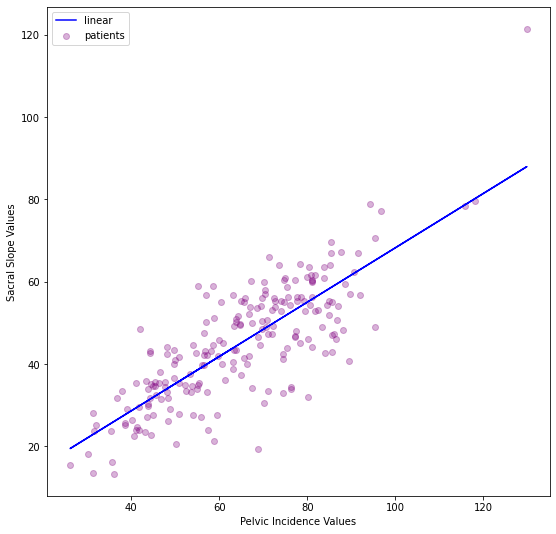

In [10]:
# Predicting new y values from our data's x values:
y_head = lr.predict(x)

plt.figure(figsize=(9,9))
plt.scatter(x,y, color='purple', alpha=0.3, label='patients')
plt.plot(x, y_head, color='blue', label='linear')
plt.xlabel('Pelvic Incidence Values')
plt.ylabel('Sacral Slope Values')
plt.legend()
plt.show()

POLYNOMIAL LINEAR REGRESSION

In [12]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=2)

x_poly = poly.fit_transform(x)

lr2 = LinearRegression()
lr2.fit(x_poly, y)
y_head2 = lr2.predict(x_poly)

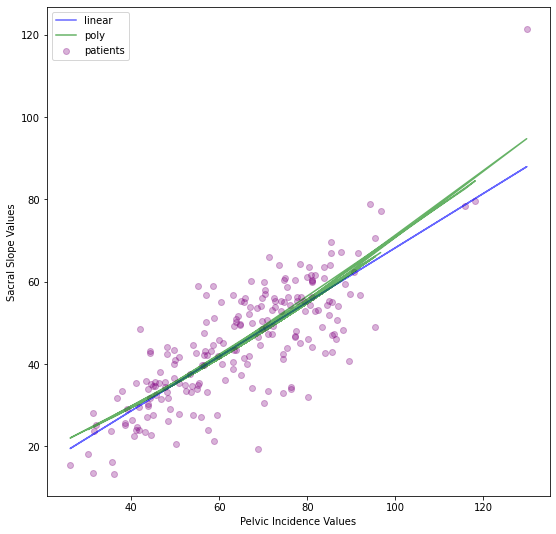

In [13]:
plt.figure(figsize=(9,9))
plt.scatter(x,y, color='purple', alpha=0.3, label='patients')
plt.plot(x, y_head, color='blue', alpha=0.6, label='linear')
plt.plot(x, y_head2, color='green', alpha=0.6, label='poly')
plt.xlabel('Pelvic Incidence Values')
plt.ylabel('Sacral Slope Values')
plt.legend()
plt.show()

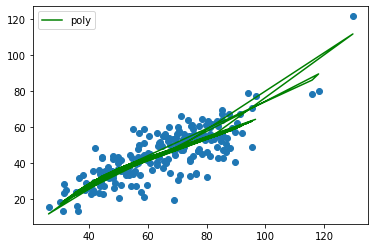

In [14]:
from sklearn.preprocessing import PolynomialFeatures
polynomial_regression = PolynomialFeatures(degree = 3) #degree increases reliability

x_poly = polynomial_regression.fit_transform(x) 

linear_regression2 = LinearRegression()
linear_regression2.fit(x_poly,y)


prediction_poly = linear_regression2.predict(x_poly)
plt.scatter(x,y)
plt.plot(x,prediction_poly,color="green",label = "poly")
plt.legend()
plt.show()

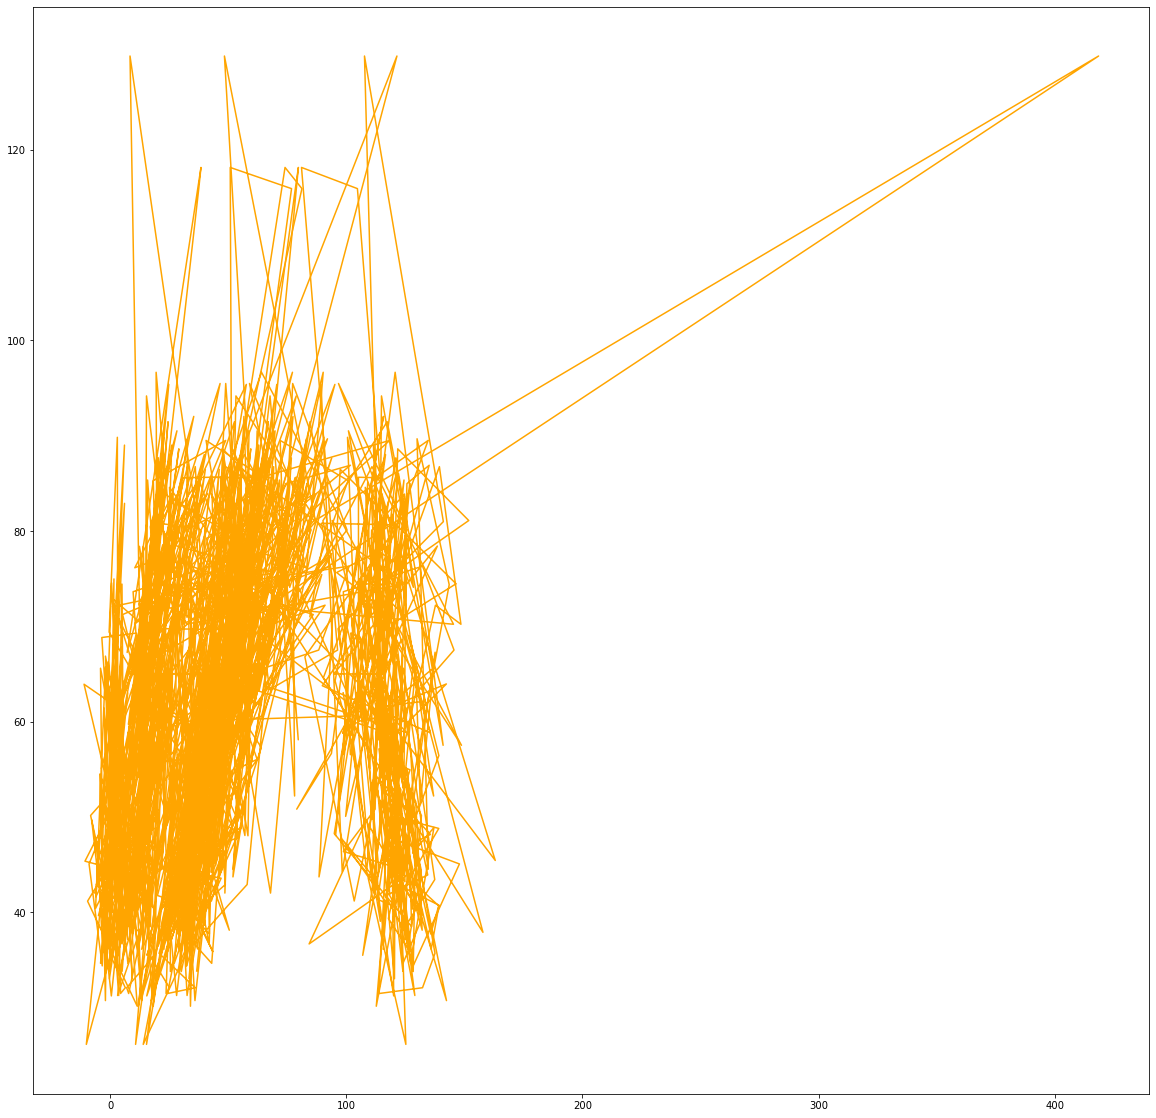

In [19]:
from sklearn.preprocessing import PolynomialFeatures
polynomial_regression = PolynomialFeatures(degree = 4)
x_polynomial = polynomial_regression.fit_transform(x)
from sklearn.linear_model import LinearRegression
plt.figure(figsize=[20,20])
poly_reg=LinearRegression()
poly_reg.fit(x_polynomial,y)
y_head=poly_reg.predict(x_polynomial)
plt.plot(x,y_head,color="orange")
plt.show()

Multiple Linear Regression

In [16]:
from sklearn.linear_model import LinearRegression

x=data.iloc[:,[1,2,3,4,5]].values
y=data.pelvic_incidence.values.reshape(-1,1)

multiple_reg=LinearRegression()
multiple_reg.fit(x,y)
print("b0: ",multiple_reg.intercept_) # or print("b0: ",multiple_reg.predict(0))
print("b1,b2,b3,b4,b5 : ", multiple_reg.coef_)

b0:  [-4.42312853e-10]
b1,b2,b3,b4,b5 :  [[ 1.00000000e+00  1.88668849e-11  1.00000000e+00  6.21912163e-12
  -5.31237517e-12]]


In [17]:
y_head=multiple_reg.predict(x)
#%% R^2 score
from sklearn.metrics import r2_score
print("R^2 : ",r2_score(y,y_head))

R^2 :  1.0


In [18]:
#%% R^2 score
print("R^2 :",multiple_reg.score(x,y))

R^2 : 1.0
